In [1]:
import os
import random
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

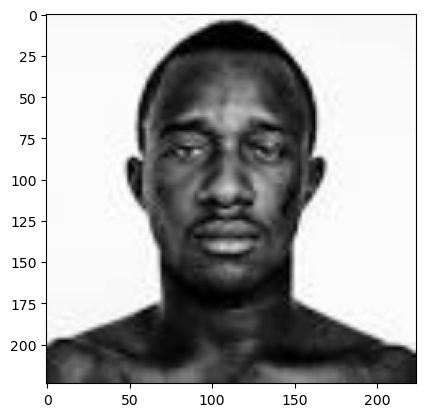

In [31]:

img = cv2.imread('./data/without_mask/without_mask_1.jpg')  
img = cv2.resize(img,(224,224))
# Convert the image from BGR to RGB (OpenCV loads images in BGR format by default)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.imshow(img_rgb)
plt.show()

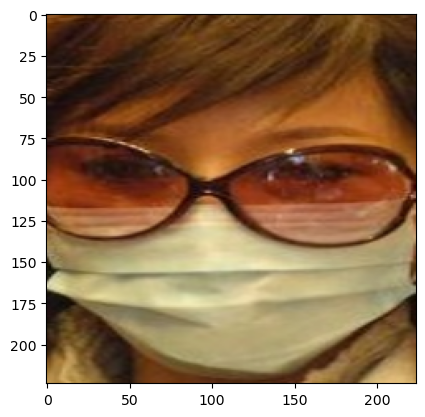

In [41]:

img = cv2.imread('./data/with_mask/with_mask_10.jpg') 
img = cv2.resize(img,(224,224))
# Convert the image from BGR to RGB (OpenCV loads images in BGR format by default)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.imshow(img_rgb)
plt.show()

In [7]:
data = []
categories = ['with_mask','without_mask']

for i in categories:
    path = os.path.join('data',i)
    label = categories.index(i)
    for j in os.listdir(path):
        img_path = os.path.join(path,j)
        img = cv2.imread(img_path)
        img = cv2.resize(img,(128,128))
        data.append([img,label])    

In [28]:
# x = []
# y = []
# categories = ['with_mask','without_mask']

# for i in categories:
#     path = os.path.join('data',i)
#     label = categories.index(i)
#     for j in os.listdir(path):
#         img_path = os.path.join(path,j)
#         img = cv2.imread(img_path)
#         img = cv2.resize(img,(224,224))
        
#         x.append(img)
#         y.append(label)

In [9]:
random.shuffle(data)

In [10]:
x = []
y = []

for i,j in data:
    x.append(i)
    y.append(j)

In [12]:
import numpy as np

In [13]:
x = np.array(x)
y = np.array(y)

In [14]:
x.shape

(7553, 128, 128, 3)

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [17]:
 x_train.shape,x_test.shape

((5287, 128, 128, 3), (2266, 128, 128, 3))

In [18]:
y_train.shape

(5287,)

In [19]:
x_train1 = x_train.astype('float32')
x_train_scale1 = x_train1/255

In [20]:
x_test_scale = x_test/255

In [22]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(2,activation="sigmoid"))


model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',
             metrics = ['acc'])

In [23]:
history = model.fit(x_train_scale1,y_train,validation_split=0.1,epochs=7)

Epoch 1/7
149/149 [==============================] - 101s 660ms/step - loss: 0.5196 - acc: 0.7703 - val_loss: 0.2963 - val_acc: 0.8790
Epoch 2/7
149/149 [==============================] - 99s 662ms/step - loss: 0.3259 - acc: 0.8676 - val_loss: 0.2643 - val_acc: 0.8866
Epoch 3/7
149/149 [==============================] - 94s 634ms/step - loss: 0.2655 - acc: 0.8983 - val_loss: 0.2743 - val_acc: 0.8847
Epoch 4/7
149/149 [==============================] - 101s 682ms/step - loss: 0.2411 - acc: 0.8981 - val_loss: 0.2885 - val_acc: 0.8941
Epoch 5/7
149/149 [==============================] - 97s 652ms/step - loss: 0.2084 - acc: 0.9159 - val_loss: 0.2404 - val_acc: 0.9112
Epoch 6/7
149/149 [==============================] - 93s 626ms/step - loss: 0.1928 - acc: 0.9174 - val_loss: 0.2564 - val_acc: 0.8998
Epoch 7/7
149/149 [==============================] - 95s 634ms/step - loss: 0.1671 - acc: 0.9348 - val_loss: 0.2549 - val_acc: 0.9168


In [25]:
loss , accuracy = model.evaluate(x_test_scale,y_test)
print('test accuracy = ',accuracy)

71/71 [==============================] - 13s 174ms/step - loss: 0.2558 - acc: 0.9289
test accuracy =  0.9289497137069702


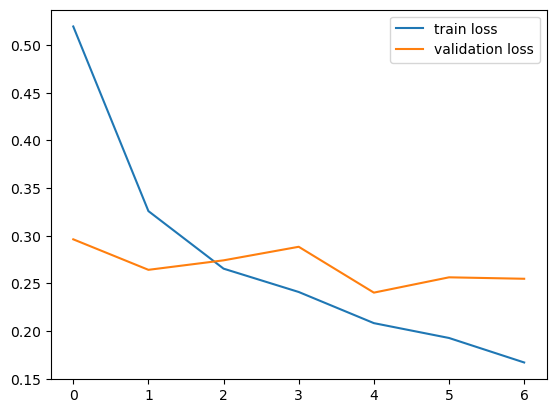

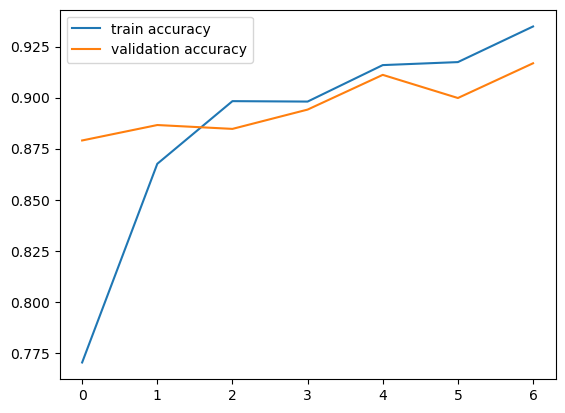

In [27]:

h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()